Welcome to the Classifier written by Swostik Nepal. This classifier class can perform kNN classification and plot the results for you. How awesome!
Output class for the new student is: 1


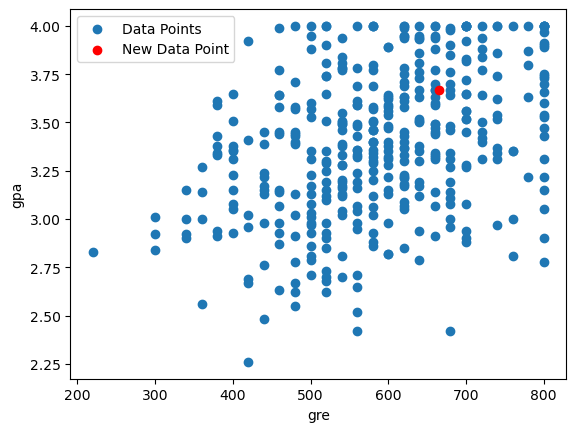

In [1]:
import csv
import math
import matplotlib.pyplot as plt
import pandas as pd

class my_classifier:
    def __init__(self, name):
        self.k = 5
        self.name = name
        print(f"Welcome to the Classifier written by {'Swostik Nepal'}. This classifier class can perform kNN classification and plot the results for you. How awesome!")

    def euclidean_distance(self, point1, point2):
        return math.sqrt(sum((a - b) ** 2 for a, b in zip(point1, point2)))

    def k_nearest_neighbors(self, input_data):
        X = []
        Y = []
        with open('Entrance_Selection.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',')
            next(spamreader)
            for row in spamreader:
                Y.append(int(row[0]))  # Convert admit label to integer (0 or 1)
                X.append([float(val) for val in row[1:4]])  # Use only the first three features (gre and gpa and rank)

        distances = [(self.euclidean_distance(input_data, x), y) for x, y in zip(X, Y)]
        distances.sort(key=lambda x: x[0])

        k_nearest = distances[:self.k]
        labels = [label for _, label in k_nearest]

        # Classify the new student based on majority vote of K neighbors
        return 1 if sum(labels) >= self.k / 2 else 0

    def my_plot(self, feature1, feature2, data_point=None):
        try:
            data = pd.read_csv('Entrance_Selection.csv')

            if feature1 not in data.columns or feature2 not in data.columns:
                raise ValueError("Invalid feature names.")

            plt.scatter(data[feature1], data[feature2], label="Data Points")

            if data_point is not None:
                plt.scatter(data_point[0], data_point[1], color='red', label="New Data Point")

            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
            plt.show()

        except Exception as e:
            raise e


if __name__ == "__main__":
    name = "Swostik"
    classifier = my_classifier(name)

    new_student = [665, 3.67,3]  # We use only the first two features (gre and gpa)
    output_class = classifier.k_nearest_neighbors(input_data=new_student)
    print(f"Output class for the new student is: {output_class}")

    classifier.my_plot('gre', 'gpa', data_point=[new_student[0], new_student[1]])


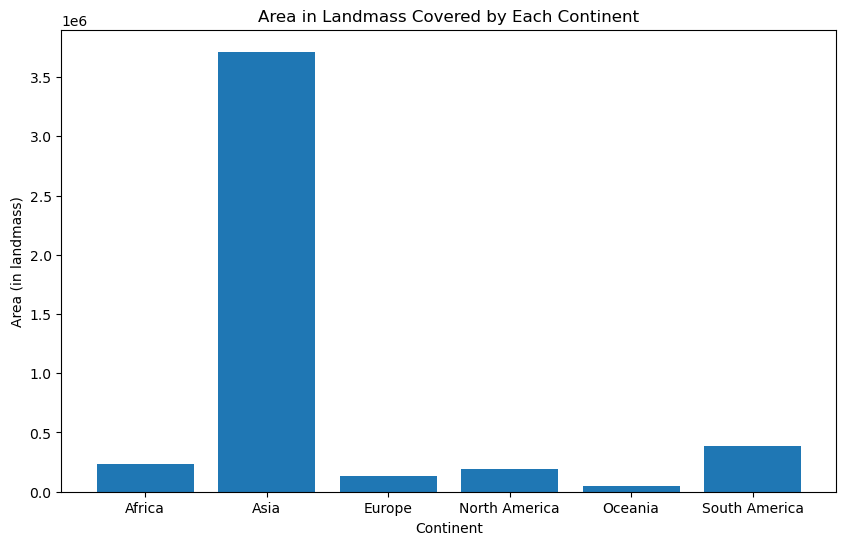

Cities with highest elevation for each continent:
                          name                     country      continent  \
continent                                                                   
Africa        475       Dessie                    Ethiopia         Africa   
Asia          1119       Nagqu  People's Republic of China           Asia   
Europe        875   Kramatorsk                     Ukraine         Europe   
North America 1673      Toluca                      Mexico  North America   
Oceania       703       Hobart                   Australia        Oceania   
South America 515      El Alto                     Bolivia  South America   

                    elevation        lat        long  
continent                                             
Africa        475      2470.0  11.133333   39.633333  
Asia          1119     4500.0  31.476650   92.056910  
Europe        875      1773.0  48.720833   37.555556  
North America 1673     2660.0  19.292222  -99.653889  
Oce

In [3]:
#1
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cities.csv')

continent_area = data.groupby('continent', as_index=False)['area'].sum()


plt.figure(figsize=(10, 6))
plt.bar(continent_area['continent'], continent_area['area'])
plt.xlabel('Continent')
plt.ylabel('Area (in landmass)')
plt.title('Area in Landmass Covered by Each Continent')
plt.show()

#2
cities_highest_elevation = data.groupby('continent').apply(lambda x: x.nlargest(1, 'elevation'))
cities_lowest_elevation = data.groupby('continent').apply(lambda x: x.nsmallest(1, 'elevation'))

print("Cities with highest elevation for each continent:")
print(cities_highest_elevation[['name', 'country', 'continent', 'elevation', 'lat', 'long']])

print("\nCities with lowest elevation for each continent:")
print(cities_lowest_elevation[['name', 'country', 'continent', 'elevation', 'lat', 'long']])

#3
if 'population' in data.columns and 'area' in data.columns:
    data['PopulationDensity'] = data['population'] / data['area']
else:
    print("Population or Area columns are missing in the data.")
    exit()  # Exit the program if the required columns are missing

cities_highest_density = data.nlargest(5, 'PopulationDensity')
cities_lowest_density = data.nsmallest(5, 'PopulationDensity')

print("\nCities with highest population density:")
print(cities_highest_density[['name', 'country', 'continent', 'PopulationDensity']])

print("\nCities with lowest population density:")
print(cities_lowest_density[['name', 'country', 'continent', 'PopulationDensity']])
